In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
df = pd.read_csv('/home/hugo/projetos-doutorado/mimo_emb_fts/data/energydata_complete.csv', sep=',')

df.head()


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame) 
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [4]:

df = df.drop(labels=['date','rv1', 'rv2'], axis=1)
df = clean_dataset(df)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [5]:
df.shape

(19735, 26)

In [6]:

train_df,test_df = df[:14803], df[14803:]

In [7]:
# train = train_df
# scalers={}
# for i in train_df.columns:
#     scaler = MinMaxScaler(feature_range=(-1,1))
#     s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
#     s_s=np.reshape(s_s,len(s_s))
#     scalers['scaler_'+ i] = scaler
#     train[i]=s_s
# test = test_df
# for i in train_df.columns:
#     scaler = scalers['scaler_'+i]
#     s_s = scaler.transform(test[i].values.reshape(-1,1))
#     s_s=np.reshape(s_s,len(s_s))
#     scalers['scaler_'+i] = scaler
#     test[i]=s_s
    
    
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler()
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

<ipython-input-7-063ef81e3019>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-7-063ef81e3019>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[i]=s_s
<ipython-input-7-063ef81e3019>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [8]:
def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [9]:
n_past = 1
n_future = 1
n_features = 26

In [10]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [11]:
# X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0], X_test.shape[2]),columns=list(train_df.columns))
# X_test_df

In [12]:
# y_test_df = pd.DataFrame(y_test.reshape(y_test.shape[0], y_test.shape[2]),columns=list(test_df.columns))
# y_test_df

In [13]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

#
model_e1d1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 26)]      0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100), (None, 50800       input_1[0][0]                    
__________________________________________________________________________________________________
repeat_vector (RepeatVector)    (None, 1, 100)       0           lstm[0][0]                       
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1, 100)       80400       repeat_vector[0][0]              
                                                                 lstm[0][1]                   

In [14]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1, 26)]      0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 1, 100), (No 50800       input_2[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 100), (None, 80400       lstm_2[0][0]                     
__________________________________________________________________________________________________
repeat_vector_1 (RepeatVector)  (None, 1, 100)       0           lstm_3[0][0]                     
____________________________________________________________________________________________

In [15]:
epochs = 25

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

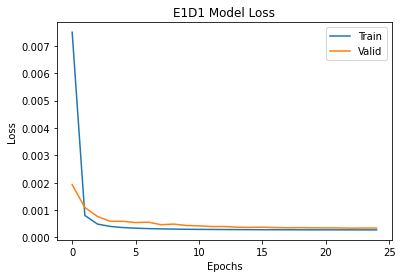

In [16]:
plt.plot(history_e1d1.history['loss'])
plt.plot(history_e1d1.history['val_loss'])
plt.title("E1D1 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

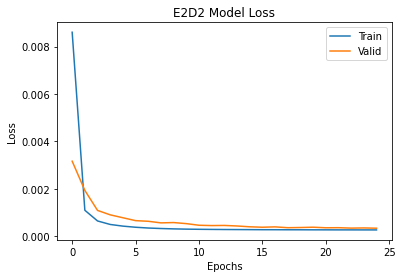

In [17]:
plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title("E2D2 Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Valid'])
plt.show()

In [18]:
pred1_e1d1=model_e1d1.predict(X_test)
pred1_e2d2=model_e2d2.predict(X_test)

pred_e1d1=model_e1d1.predict(X_train)
pred_e2d2=model_e2d2.predict(X_train)

In [19]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred1_e1d1[:,:,index]=scaler.inverse_transform(pred1_e1d1[:,:,index])
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    
    pred1_e2d2[:,:,index]=scaler.inverse_transform(pred1_e2d2[:,:,index])
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [20]:
y_test.shape

(4931, 1, 26)

In [21]:
# pred1_e1d1 = pred1_e1d1.reshape(pred1_e1d1.shape[0], pred1_e1d1.shape[2])
# forecast_e1d1 = pd.DataFrame(pred1_e1d1,columns=list(df.columns))

# pred1_e2d2 = pred1_e2d2.reshape(pred1_e2d2.shape[0], pred1_e2d2.shape[2])
# forecast_e2d2 = pd.DataFrame(pred1_e2d2,columns=list(df.columns))

In [22]:
# y_test_df = y_test.reshape(y_test.shape[0], y_test.shape[2])
# test_val_df = pd.DataFrame(y_test_df,columns=list(df.columns))

In [23]:
pred1_e1d1.shape

(4931, 1, 26)

In [24]:
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score
# import matplotlib.pyplot as plt
 
# # original = original[:len(original)-1]
# # forecast = forecast[1:]  

# validation_df = test_val_df
    
# for index,i in enumerate(validation_df.columns):
#     print(i)
    
#     original = validation_df[i].values
#     forecast1 = forecast_e1d1[i].values
#     forecast2 = forecast_e2d2[i].values
# #     original = original[:len(original)-1]
# #     forecast1 = forecast1[1:]
# #     forecast2 = forecast2[1:]
    
#     print("RMSE-E1D1 : ",mean_squared_error(original,forecast1,squared=False),end=", ")
#     print("RMSE-E2D2 : ",mean_squared_error(original,forecast2,squared=False))
#     print("R2-E1D1 : ",r2_score(original,forecast1),end=", ")
#     print("R2-E2D2 : ",r2_score(original,forecast2))
#     print("MAE-E1D1 : ",mean_absolute_error(original,forecast1),end=", ")
#     print("MAE-E2D2 : ",mean_absolute_error(original,forecast2))
    
#     fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
#     ax.plot(original, label='Original')
#     ax.plot(forecast1, label='Forecast')
#     handles, labels = ax.get_legend_handles_labels()
#     lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
#     plt.show()
    
#     print()

Appliances
Hour  1 :
RMSE-E1D1 :  61.16259976720341, RMSE-E2D2 :  60.79176090933195
NRMSE-E1D1 :  0.07368987923759446, NRMSE-E2D2 :  0.07324308543293005
MAE-E1D1 :  32.73073970954816, MAE-E2D2 :  27.850385909388983
r2-E1D1 :  0.5183615061426177, r2-E2D2 :  0.5241843062849438
MAPE-E1D1 :  0.36789917889717577, MAPE-E2D2 :  0.26286771006182036


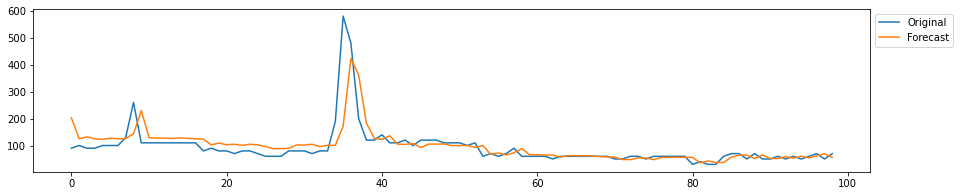



lights
Hour  1 :
RMSE-E1D1 :  4.059532542877239, RMSE-E2D2 :  3.8406837118756867
NRMSE-E1D1 :  0.1353177514292413, NRMSE-E2D2 :  0.12802279039585623
MAE-E1D1 :  2.2377295496587797, MAE-E2D2 :  2.1203972242910076
r2-E1D1 :  0.4656147060338607, r2-E2D2 :  0.5216789092346128
MAPE-E1D1 :  5138356207726737.0, MAPE-E2D2 :  5197609254874707.0


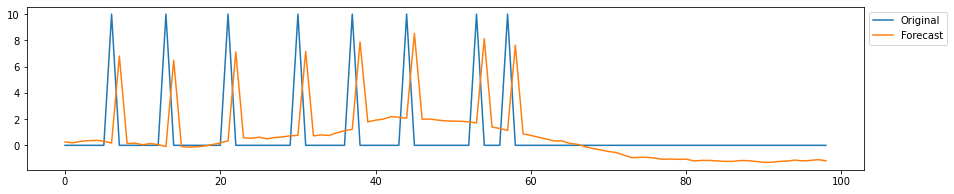



T1
Hour  1 :
RMSE-E1D1 :  0.22464769733942125, RMSE-E2D2 :  0.16653403910149747
NRMSE-E1D1 :  0.035886213632495396, NRMSE-E2D2 :  0.02660288164560662
MAE-E1D1 :  0.17290112541516967, MAE-E2D2 :  0.1316315319968512
r2-E1D1 :  0.9760789868397697, r2-E2D2 :  0.9868543623152781
MAPE-E1D1 :  0.007132511247668312, MAPE-E2D2 :  0.005470175716738889


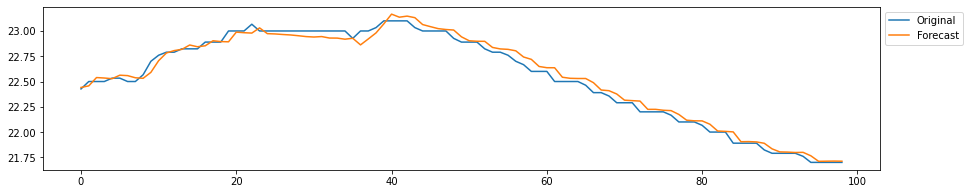



RH_1
Hour  1 :
RMSE-E1D1 :  0.5014044194191374, RMSE-E2D2 :  0.6394605506140589
NRMSE-E1D1 :  0.018138348706829954, NRMSE-E2D2 :  0.023132541322105047
MAE-E1D1 :  0.31677795100290784, MAE-E2D2 :  0.43993851848243093
r2-E1D1 :  0.9900433417434013, r2-E2D2 :  0.9838056022955034
MAPE-E1D1 :  0.008119430420052393, MAPE-E2D2 :  0.010746952570953962


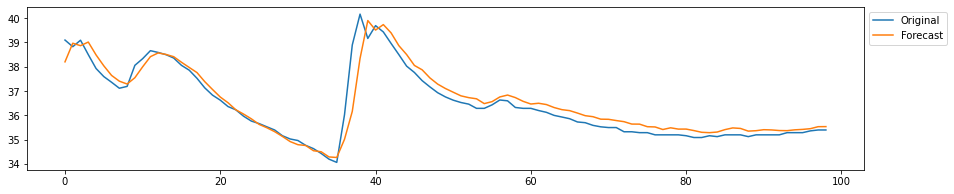



T2
Hour  1 :
RMSE-E1D1 :  0.1967220347030675, RMSE-E2D2 :  0.3145890737066624
NRMSE-E1D1 :  0.015421115863841156, NRMSE-E2D2 :  0.024660758325580998
MAE-E1D1 :  0.13218423361233722, MAE-E2D2 :  0.2168265880199771
r2-E1D1 :  0.9941364965839845, r2-E2D2 :  0.9850052773770587
MAPE-E1D1 :  0.0056451455946277184, MAPE-E2D2 :  0.009039947120321051


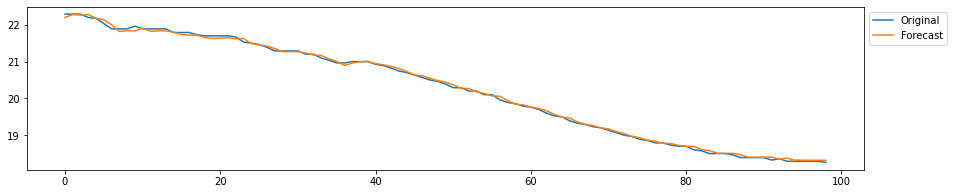



RH_2
Hour  1 :
RMSE-E1D1 :  0.4966987871106677, RMSE-E2D2 :  0.538475309574397
NRMSE-E1D1 :  0.014770978998136413, NRMSE-E2D2 :  0.016013341878699336
MAE-E1D1 :  0.34327207914345736, MAE-E2D2 :  0.3826036443127941
r2-E1D1 :  0.9919675964469284, r2-E2D2 :  0.9905595888355622
MAPE-E1D1 :  0.008578887161056724, MAPE-E2D2 :  0.010383800849681562


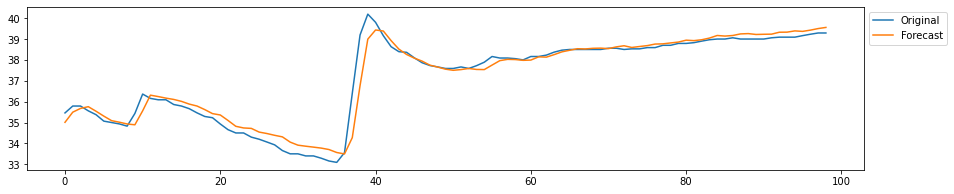



T3
Hour  1 :
RMSE-E1D1 :  0.14260823698570327, RMSE-E2D2 :  0.1782589373214173
NRMSE-E1D1 :  0.017315230328521523, NRMSE-E2D2 :  0.021643872914208023
MAE-E1D1 :  0.10305330751301249, MAE-E2D2 :  0.13806899302028805
r2-E1D1 :  0.9927581902934872, r2-E2D2 :  0.9886848448505244
MAPE-E1D1 :  0.004091916972444838, MAPE-E2D2 :  0.005511778194417502


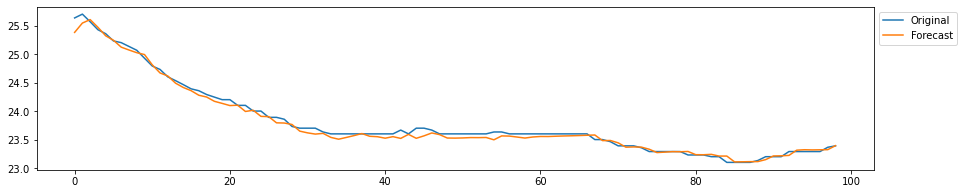



RH_3
Hour  1 :
RMSE-E1D1 :  0.29906644284891815, RMSE-E2D2 :  0.24930262159156436
NRMSE-E1D1 :  0.015801326673947833, NRMSE-E2D2 :  0.013172030024210921
MAE-E1D1 :  0.19369498461569448, MAE-E2D2 :  0.167666002959061
r2-E1D1 :  0.992312727661266, r2-E2D2 :  0.994658163543244
MAPE-E1D1 :  0.005189266328654463, MAPE-E2D2 :  0.004398637559091755


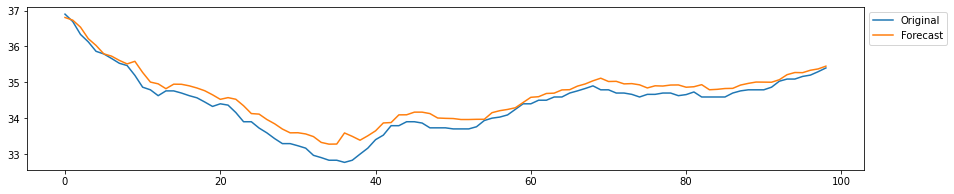



T4
Hour  1 :
RMSE-E1D1 :  0.27590196595828365, RMSE-E2D2 :  0.2110956165383964
NRMSE-E1D1 :  0.039414566565469114, NRMSE-E2D2 :  0.030156516648342357
MAE-E1D1 :  0.20173276772201942, MAE-E2D2 :  0.153959260036983
r2-E1D1 :  0.9745797973693355, r2-E2D2 :  0.9851191462569352
MAPE-E1D1 :  0.008306857327600196, MAPE-E2D2 :  0.006368526757867547


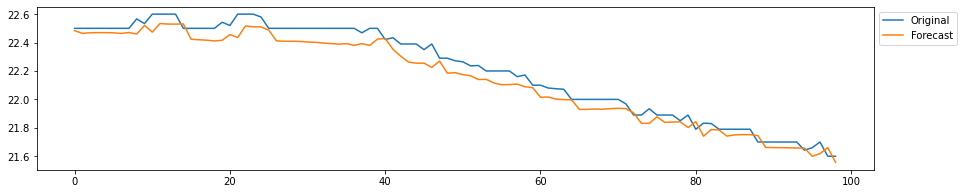



RH_4
Hour  1 :
RMSE-E1D1 :  0.3012480833691176, RMSE-E2D2 :  0.3421020602594034
NRMSE-E1D1 :  0.013665763172251747, NRMSE-E2D2 :  0.015519055537080533
MAE-E1D1 :  0.22025795373159907, MAE-E2D2 :  0.27389693819609
r2-E1D1 :  0.9956917474404624, r2-E2D2 :  0.9944439780979301
MAPE-E1D1 :  0.00587148602504092, MAPE-E2D2 :  0.0072634877294410075


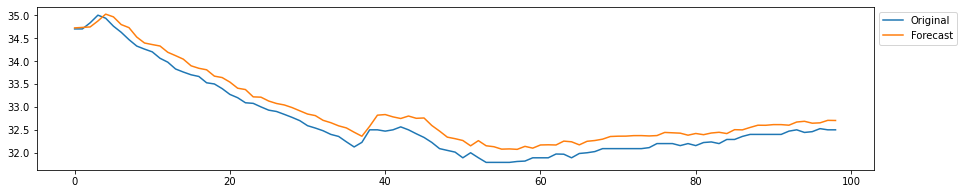



T5
Hour  1 :
RMSE-E1D1 :  0.17389245818916238, RMSE-E2D2 :  0.20151443309932832
NRMSE-E1D1 :  0.024168513994324167, NRMSE-E2D2 :  0.028007565406438957
MAE-E1D1 :  0.10668579089724697, MAE-E2D2 :  0.1336338030377711
r2-E1D1 :  0.989737102025569, r2-E2D2 :  0.9862177275095829
MAPE-E1D1 :  0.004694774900985539, MAPE-E2D2 :  0.005864374559472519


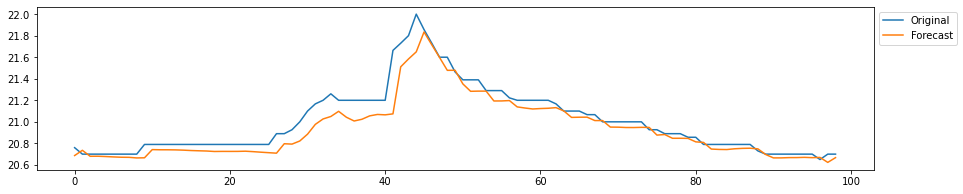



RH_5
Hour  1 :
RMSE-E1D1 :  2.3161929650912993, RMSE-E2D2 :  2.349242353657492
NRMSE-E1D1 :  0.03831479085370624, NRMSE-E2D2 :  0.03886149850278444
MAE-E1D1 :  0.8864108399736383, MAE-E2D2 :  0.9282265229189988
r2-E1D1 :  0.9312126182453803, r2-E2D2 :  0.9292355807552932
MAPE-E1D1 :  0.016846590086116223, MAPE-E2D2 :  0.01771899678697646


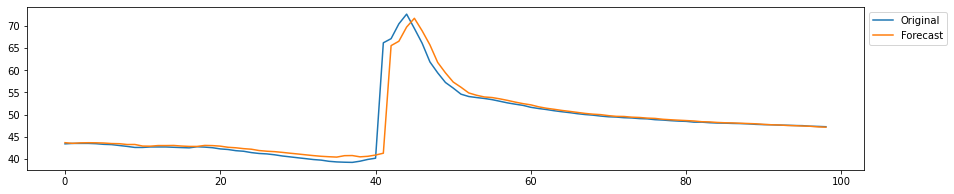



T6
Hour  1 :
RMSE-E1D1 :  0.5874353694169229, RMSE-E2D2 :  0.5682446484955147
NRMSE-E1D1 :  0.02005583371174199, NRMSE-E2D2 :  0.01940063668472225
MAE-E1D1 :  0.4424987296566878, MAE-E2D2 :  0.4115927065901194
r2-E1D1 :  0.9923181673301066, r2-E2D2 :  0.9928118791825279
MAPE-E1D1 :  68225210630.119705, MAPE-E2D2 :  65450903517.56911


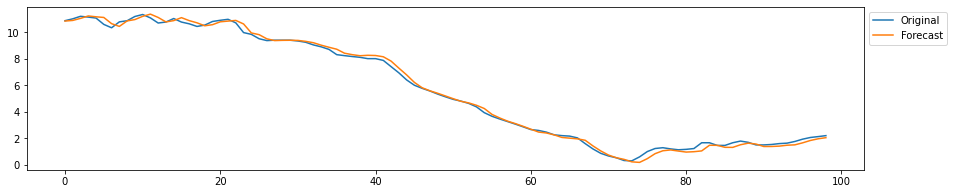



RH_6
Hour  1 :
RMSE-E1D1 :  1.7728725893201083, RMSE-E2D2 :  1.9015415863828435
NRMSE-E1D1 :  0.030018161011176908, NRMSE-E2D2 :  0.03219677592927266
MAE-E1D1 :  1.2686879696492872, MAE-E2D2 :  1.323125440591772
r2-E1D1 :  0.9926468031051998, r2-E2D2 :  0.9915407316917829
MAPE-E1D1 :  0.3717810500750617, MAPE-E2D2 :  0.40421307406309154


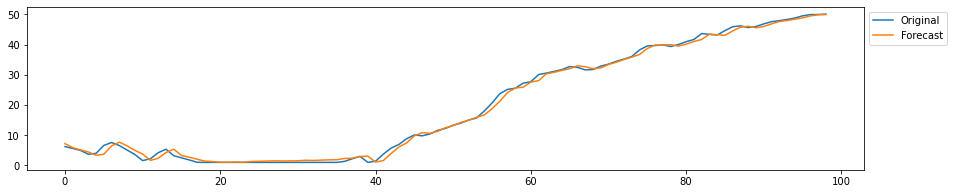



T7
Hour  1 :
RMSE-E1D1 :  0.20379148978213496, RMSE-E2D2 :  0.1653522202219214
NRMSE-E1D1 :  0.028662656790736284, NRMSE-E2D2 :  0.02325628976398332
MAE-E1D1 :  0.14823332033140663, MAE-E2D2 :  0.11946040220495849
r2-E1D1 :  0.9871397384501697, r2-E2D2 :  0.9915336196666245
MAPE-E1D1 :  0.006277675970020112, MAPE-E2D2 :  0.005065133221921305


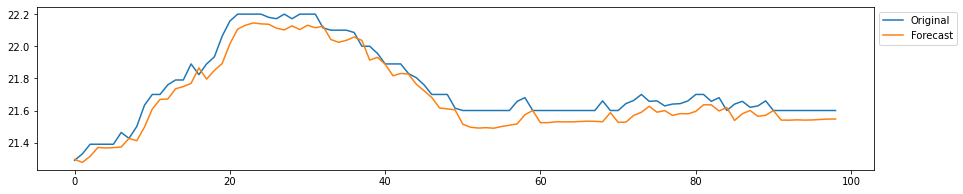



RH_7
Hour  1 :
RMSE-E1D1 :  0.46657822863371606, RMSE-E2D2 :  0.4286531968906765
NRMSE-E1D1 :  0.01926152037843883, NRMSE-E2D2 :  0.01769587987714368
MAE-E1D1 :  0.3470424431128826, MAE-E2D2 :  0.3083885122032772
r2-E1D1 :  0.9923897425007903, r2-E2D2 :  0.9935766358155319
MAPE-E1D1 :  0.009117765581959373, MAPE-E2D2 :  0.008279582962532322


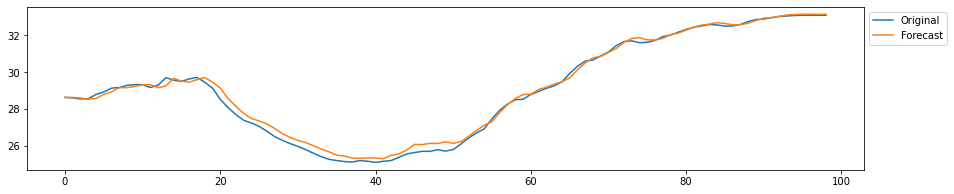



T8
Hour  1 :
RMSE-E1D1 :  0.20496594014421643, RMSE-E2D2 :  0.2298230346138166
NRMSE-E1D1 :  0.02953399713893608, NRMSE-E2D2 :  0.033115711039454834
MAE-E1D1 :  0.15683088401556378, MAE-E2D2 :  0.17573389757027583
r2-E1D1 :  0.977529105625905, r2-E2D2 :  0.9717483335526149
MAPE-E1D1 :  0.006347917651333373, MAPE-E2D2 :  0.007091641488695454


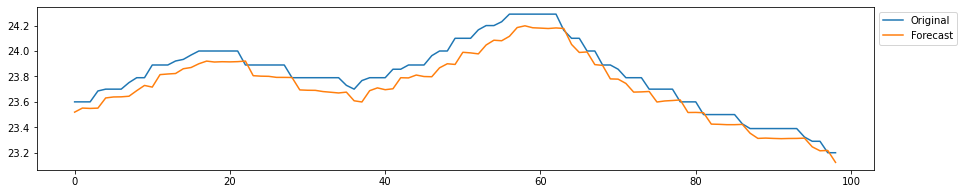



RH_8
Hour  1 :
RMSE-E1D1 :  0.4173561593961986, RMSE-E2D2 :  0.414249481240443
NRMSE-E1D1 :  0.01762980115725989, NRMSE-E2D2 :  0.01749857003268559
MAE-E1D1 :  0.31029849372897494, MAE-E2D2 :  0.31290674017535525
r2-E1D1 :  0.9932920799502155, r2-E2D2 :  0.9933915718934357
MAPE-E1D1 :  0.007521523603335895, MAPE-E2D2 :  0.007565993829931564


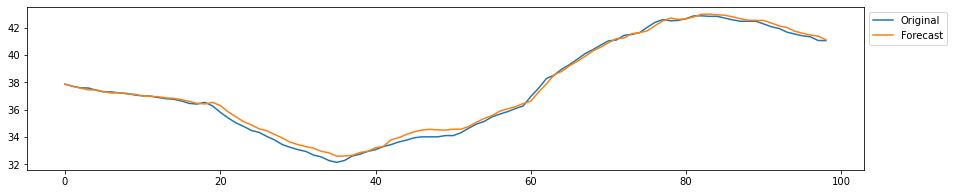



T9
Hour  1 :
RMSE-E1D1 :  0.2559568266660217, RMSE-E2D2 :  0.27936072430761016
NRMSE-E1D1 :  0.04338251299424098, NRMSE-E2D2 :  0.047349275306374616
MAE-E1D1 :  0.1883804404232911, MAE-E2D2 :  0.21088251327373866
r2-E1D1 :  0.977239628909021, r2-E2D2 :  0.9728870607894499
MAPE-E1D1 :  0.008187265096763343, MAPE-E2D2 :  0.009203964694898073


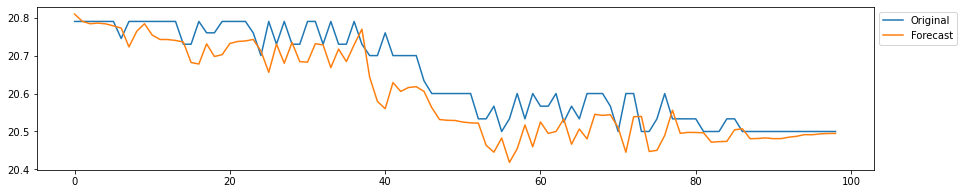



RH_9
Hour  1 :
RMSE-E1D1 :  0.3184047910670096, RMSE-E2D2 :  0.3065395344002083
NRMSE-E1D1 :  0.014233986606679235, NRMSE-E2D2 :  0.013703561471070904
MAE-E1D1 :  0.23128453814308966, MAE-E2D2 :  0.22218875887129264
r2-E1D1 :  0.995383907816201, r2-E2D2 :  0.9957215321586589
MAPE-E1D1 :  0.005589284257837256, MAPE-E2D2 :  0.005471630085414366


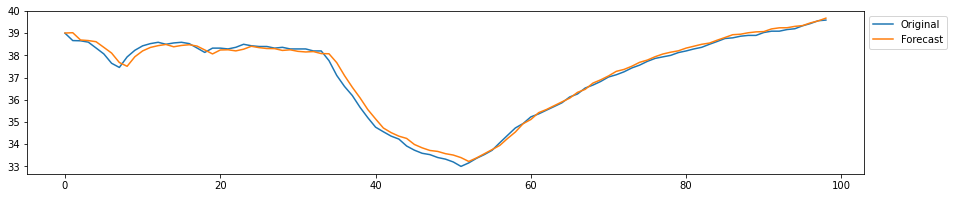



T_out
Hour  1 :
RMSE-E1D1 :  0.45204058225802246, RMSE-E2D2 :  0.4481539273648284
NRMSE-E1D1 :  0.016994006851805354, NRMSE-E2D2 :  0.016847892006196557
MAE-E1D1 :  0.3290122225075861, MAE-E2D2 :  0.32652404937171137
r2-E1D1 :  0.9938076841665914, r2-E2D2 :  0.9939137097296926
MAPE-E1D1 :  459706439350.6753, MAPE-E2D2 :  499545250366.4414


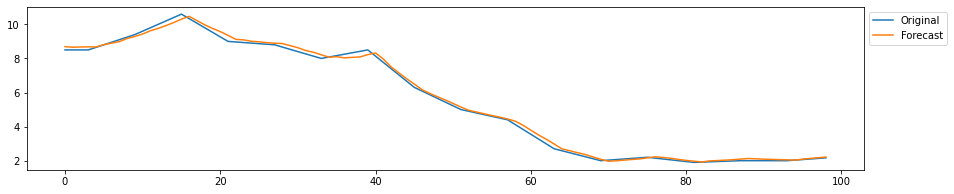



Press_mm_hg
Hour  1 :
RMSE-E1D1 :  0.391862876613379, RMSE-E2D2 :  0.5094179327263925
NRMSE-E1D1 :  0.017186968272516655, NRMSE-E2D2 :  0.02234289178624533
MAE-E1D1 :  0.2707104460830269, MAE-E2D2 :  0.34903418752130694
r2-E1D1 :  0.9945392041430458, r2-E2D2 :  0.9907713929326901
MAPE-E1D1 :  0.0003592893525687619, MAPE-E2D2 :  0.0004634360103182019


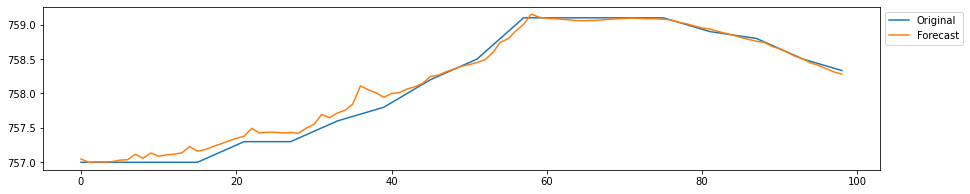



RH_out
Hour  1 :
RMSE-E1D1 :  1.1099756653759856, RMSE-E2D2 :  1.4719943000472313
NRMSE-E1D1 :  0.014604942965473494, NRMSE-E2D2 :  0.019368346053253042
MAE-E1D1 :  0.8546359107043026, MAE-E2D2 :  1.1043268674480289
r2-E1D1 :  0.9963105906177876, r2-E2D2 :  0.9935115316694846
MAPE-E1D1 :  0.012607188893878834, MAPE-E2D2 :  0.017022661876147427


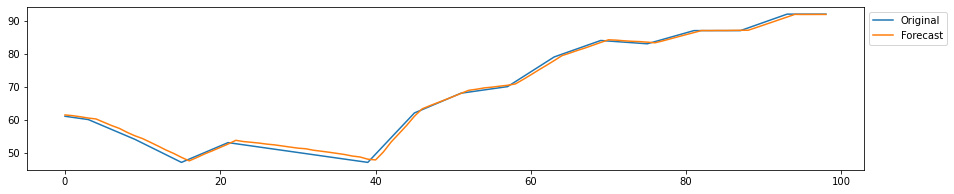



Windspeed
Hour  1 :
RMSE-E1D1 :  0.2029412616593864, RMSE-E2D2 :  0.25686897856033697
NRMSE-E1D1 :  0.02029412616593864, NRMSE-E2D2 :  0.025686897856033696
MAE-E1D1 :  0.1505192388532805, MAE-E2D2 :  0.19462886091755105
r2-E1D1 :  0.9861803990677988, r2-E2D2 :  0.977859974965151
MAPE-E1D1 :  89251522819.63786, MAPE-E2D2 :  262574488187.9596


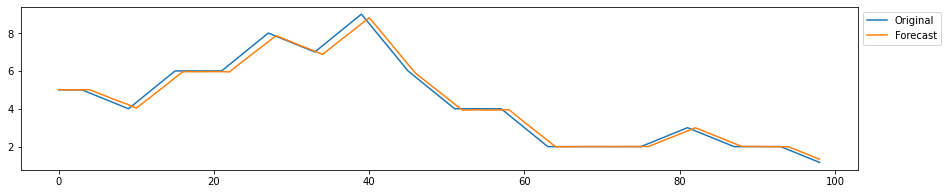



Visibility
Hour  1 :
RMSE-E1D1 :  2.1474138712114406, RMSE-E2D2 :  1.918346286828087
NRMSE-E1D1 :  0.03355334173767876, NRMSE-E2D2 :  0.02997416073168886
MAE-E1D1 :  1.4550055250679599, MAE-E2D2 :  1.1991312180239335
r2-E1D1 :  0.938048108118823, r2-E2D2 :  0.9505601577062773
MAPE-E1D1 :  0.049929982971178496, MAPE-E2D2 :  0.043484929801233654


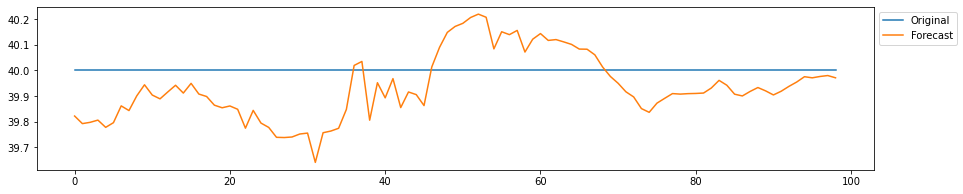



Tdewpoint
Hour  1 :
RMSE-E1D1 :  0.27236963218374693, RMSE-E2D2 :  0.2803235344405361
NRMSE-E1D1 :  0.014722682820743077, NRMSE-E2D2 :  0.015152623483272221
MAE-E1D1 :  0.20361617062322324, MAE-E2D2 :  0.20298458261081412
r2-E1D1 :  0.9963618521287209, r2-E2D2 :  0.996146262768842
MAPE-E1D1 :  2880134531579.253, MAPE-E2D2 :  2898543461976.8926


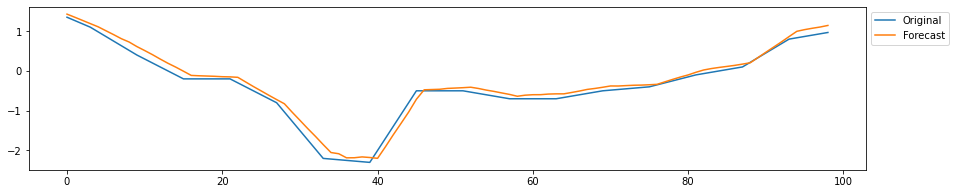

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
def cal_nrmse(rmse, y):
    x = max(y)-min(y)
    return (rmse/x)
 
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,2):
    print("Hour ",j,":")
    print("RMSE-E1D1 : ",mean_squared_error(y_test[:,j-1,index],pred1_e1d1[:,j-1,index],squared=False),end=", ")
    print("RMSE-E2D2 : ",mean_squared_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index],squared=False))
    rmse1=mean_squared_error(y_test[:,j-1,index],pred1_e1d1[:,j-1,index],squared=False)
    rmse2=mean_squared_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index],squared=False)
    print("NRMSE-E1D1 : ",cal_nrmse(rmse1,y_test[:,j-1,index]),end=", ")
    print("NRMSE-E2D2 : ",cal_nrmse(rmse2,y_test[:,j-1,index]))
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred1_e1d1[:,j-1,index]),end=", ")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index]))
    print("r2-E1D1 : ",r2_score(y_test[:,j-1,index],pred1_e1d1[:,j-1,index]),end=", ")
    print("r2-E2D2 : ",r2_score(y_test[:,j-1,index],pred1_e2d2[:,j-1,index]))
    print("MAPE-E1D1 : ",mean_absolute_percentage_error(y_test[:,j-1,index],pred1_e1d1[:,j-1,index]),end=", ")
    print("MAPE-E2D2 : ",mean_absolute_percentage_error(y_test[:,j-1,index],pred1_e2d2[:,j-1,index]))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 3])
    ax.plot(y_test[1:100,j-1,index], label='Original')
    ax.plot(pred1_e1d1[1:100,j-1,index], label='Forecast')
    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc=2, bbox_to_anchor=(1, 1))
    plt.show()
    
    
  print()
  print()